# Clasificación de Niveles de Espumado en una Línea de Producción de Bebidas Carbonatadas

## Optimización del Proceso de Producción de Bebidas Carbonatadas mediante Clasificación de Niveles de Espumado

### Autor: Civita Gonzalo Adrián



#  Introducción
### El nivel de espumado en una línea de embotellado de bebidas gaseosas es un factor crucial que puede afectar la calidad del producto final y la satisfacción del cliente. El espumado excesivo puede generar una serie de costos económicos significativos, incluyendo atrasos en la producción, pérdida de diversas materias primas, tales como una reducción en la vida útil del envase, las etiquetas, entre otros. En este proyecto, se utilizará un conjunto de datos para predecir el nivel de espumado en función de diversas variables, como la temperatura de la bebida, la temperatura del tanque carbonatador, el nivel de oxígeno disuelto en la bebida y otras variables relacionadas. El objetivo es desarrollar un modelo predictivo preciso que pueda ayudar a optimizar el proceso de embotellado y minimizar el nivel de espumado.

# Objetivos e Hipótesis
## Objetivos:
### - Desarrollar un modelo predictivo para estimar el nivel de espumado en una línea de embotellado de bebidas gaseosas.
### - Identificar un patrón en la relación entre las diferentes variables para estimar el mejor rendimiento de la unidad de embotellado, teniendo en cuenta que lo óptimo es una velocidad de 24,000 botellas por hora.

## Hipótesis:
### Existe una correlación entre el volumen de carbonatación, la temperatura de la bebida, el nivel de oxígeno disuelto en la bebida y el nivel de espumado en la línea de producción.

# Librerías

In [48]:
# Importamos las librerías necesarias para el proyecto.

import numpy as np  # Para realizar operaciones numéricas y trabajar con arreglos multidimensionales.
import pandas as pd  # Para manipulación y análisis de datos en estructuras DataFrame.
#from google.colab import files  # Para cargar archivos desde el sistema de archivos local.
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones estáticas.
import matplotlib.cm as cm  # Para trabajar con mapas de color en visualizaciones.
from matplotlib.colors import ListedColormap  # Para crear y manipular mapas de color personalizados.
import matplotlib.patches as mpatches  # Para crear formas y anotaciones en gráficos.
import plotly.express as px  # Para crear gráficos interactivos y sencillos.
import plotly.graph_objs as go  # Para crear gráficos interactivos y personalizables.
from plotly.subplots import make_subplots  # Para crear gráficos interactivos con múltiples subgráficos.
from sklearn.preprocessing import StandardScaler  # Para normalizar características eliminando la media y escalando a la varianza unitaria.
from sklearn.tree import DecisionTreeClassifier, export_text  # Para construir modelos de clasificación usando árboles de decisión.
from sklearn.neighbors import KNeighborsClassifier  # Para construir modelos de clasificación basados en K-Nearest Neighbors.
from sklearn.svm import SVC  # Para construir modelos de clasificación usando Máquinas de Soporte Vectorial.
from sklearn.naive_bayes import GaussianNB  # Para construir modelos de clasificación basados en el clasificador Naive Bayes Gaussiano.
from sklearn.metrics import accuracy_score, classification_report  # Para evaluar la precisión y generar informes de clasificación de modelos.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV  # Para dividir datos en conjuntos de entrenamiento y prueba, validación cruzada y búsqueda de hiperparámetros.
from sklearn.tree import plot_tree  # Para visualizar la estructura de un árbol de decisión.
from sklearn.metrics import confusion_matrix  # Para calcular la matriz de confusión de un modelo de clasificación.
from sklearn.metrics import ConfusionMatrixDisplay  # Para visualizar la matriz de confusión.
from sklearn.neighbors import KNeighborsRegressor  # Para construir modelos de regresión basados en K-Nearest Neighbors.
from sklearn.tree import DecisionTreeRegressor  # Para construir modelos de regresión usando árboles de decisión.
from sklearn.svm import SVR  # Para construir modelos de regresión usando Máquinas de Soporte Vectorial.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Para evaluar el desempeño de modelos de regresión con diferentes métricas.

import warnings
warnings.filterwarnings('ignore')  # Para ignorar las advertencias durante la ejecución del código.


# Análisis Exploratorio de Datos (EDA)

In [49]:
# Cargamos el archivo
#files.upload()

In [50]:
# Cargamos el archivo en formato Excel.
df = pd.read_excel("data.xlsx")

# Muestra la cantidad de filas y columnas y los nombres de dichas columanas.
forma = df.shape
columnas = df.columns
print("\n","Cabtidad de filas y columnas:",forma,"\n\n","Características:",columnas)

# Muestra las primeras filas del DataFrame.
df.head()


 Cabtidad de filas y columnas: (171, 16) 

 Características: Index(['Fecha', 'Control', 'Producto', 'O2 desaireador', 'O2 cwc',
       'O2 ing carbo', 'Set factor CO2', 'Volumen CO2', 'Temp botella',
       'Temp Carbo', 'Pres bomba', 'Azucar', 'JMAF', 'Sin Azucar',
       'Vel_llenado _botellas/ horas', 'Nivel de espumado'],
      dtype='object')


Fecha  Control Producto  O2 desaireador  O2 cwc  O2 ing carbo  \
0 2023-12-01        1       CC            0.33    0.39          0.64   
1 2023-12-01        2       CC            0.32    0.34          0.61   
2 2023-12-01        3       CC            0.34    0.36          0.59   
3 2023-12-01        4       CC            0.33    0.36          0.44   
4 2023-12-01        5       CC            0.32    0.37          0.63   

   Set factor CO2  Volumen CO2  Temp botella  Temp Carbo  Pres bomba  Azucar  \
0             3.7         4.01          12.1        11.5         4.5       1   
1             3.7         3.99           9.3         8.3         4.5       1   
2             3.7         4.00           9.1         8.1         4.5       1   
3             3.7         3.91           6.6         5.9         4.5       0   
4             3.7         3.95           6.8         5.9         4.5       0   

   JMAF  Sin Azucar  Vel_llenado _botellas/ horas  Nivel de espumado  
0     0           0                          9125                  3  
1     0           0                         13455                  3  
2     0           0                         13450                  3  
3     1           0                         21010                  1  
4     1           0                         21010                  1

In [51]:
# Usamos la caracsterísrica "Control" como indice del DataFrame.
df.set_index(["Control"], inplace = True)


In [52]:
# Muestra un resumen informativo del DataFrame, incluyendo el índice y el tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 163
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha                         171 non-null    datetime64[ns]
 1   Producto                      171 non-null    object        
 2   O2 desaireador                171 non-null    float64       
 3   O2 cwc                        171 non-null    float64       
 4   O2 ing carbo                  171 non-null    float64       
 5   Set factor CO2                171 non-null    float64       
 6   Volumen CO2                   171 non-null    float64       
 7   Temp botella                  171 non-null    float64       
 8   Temp Carbo                    171 non-null    float64       
 9   Pres bomba                    171 non-null    float64       
 10  Azucar                        171 non-null    int64         
 11  JMAF                          17

In [53]:
# Muestra las estadísticas descriptivas del DataFrame.
df.describe().T

count          mean          std      min  \
O2 desaireador                171.0      1.457427     1.625366     0.16   
O2 cwc                        171.0      1.572924     1.740589     0.21   
O2 ing carbo                  171.0      1.598480     1.615355     0.28   
Set factor CO2                171.0      3.724561     0.099317     3.60   
Volumen CO2                   171.0      3.943509     0.083119     3.77   
Temp botella                  171.0      7.678596     1.912075     4.80   
Temp Carbo                    171.0      6.619415     1.801000     4.00   
Pres bomba                    171.0      4.500000     0.000000     4.50   
Azucar                        171.0      0.678363     0.468477     0.00   
JMAF                          171.0      0.181287     0.386387     0.00   
Sin Azucar                    171.0      0.140351     0.348371     0.00   
Vel_llenado _botellas/ horas  171.0  19621.479532  4224.497730  9125.00   
Nivel de espumado             171.0      1.538012     1.107469     0.00   

                                   25%       50%        75%       max  
O2 desaireador                    0.31      0.34      2.845      4.30  
O2 cwc                            0.33      0.36      3.030      4.64  
O2 ing carbo                      0.41      0.51      3.200      4.64  
Set factor CO2                    3.70      3.70      3.700      4.00  
Volumen CO2                       3.89      3.91      3.990      4.27  
Temp botella                      6.35      7.00      9.100     12.40  
Temp Carbo                        5.30      6.10      8.000     11.50  
Pres bomba                        4.50      4.50      4.500      4.50  
Azucar                            0.00      1.00      1.000      1.00  
JMAF                              0.00      0.00      0.000      1.00  
Sin Azucar                        0.00      0.00      0.000      1.00  
Vel_llenado _botellas/ horas  14955.00  21399.00  22899.000  24071.00  
Nivel de espumado                 1.00      1.00      3.000      3.00

In [54]:
#Eliminamos la columna "Fecha".
df = df.drop('Fecha', axis = 1)

#Eliminamos la columna "Pres bomba" por comsiderarla intrascendente ya que posee el mismo valor para todos los datos recolectados.
df = df.drop(['Pres bomba', 'Producto'], axis = 1)

In [55]:
#Creamos el gráfico de calor para la matriz de correlación
fig = px.imshow(df.corr(),
                text_auto=True,
                aspect="auto",
                title="Matriz de Correlación",
                labels={"color": "Correlación"},
                color_continuous_scale=px.colors.diverging.Tealrose,
                zmin=-1,
                zmax=1)
fig.show()
plt.close()

### A través de la matriz de correlación, podemos identificar, mediante el índice de Pearson, ciertos puntos que nos permiten apoyar nuestra hipótesis.
### Identificamos que la temperatura tiene una correlación negativa con respecto a la velocidad de llenado y, aunque en menor medida, el volumen de CO2 y el O2 disuelto en la bebida también.
### Además, podemos observar que los tipos de endulzantes difieren en su relación con la velocidad de llenado.

### El uso de la matriz de correlación y el índice de Pearson es fundamental en la exploración de datos para entender las relaciones entre variables. En este caso, identificar que la temperatura tiene una correlación negativa con la velocidad de llenado puede ser crucial para optimizar procesos industriales, como en la producción de bebidas. La observación de que el volumen de CO2 y el O2 disuelto también tienen alguna influencia, aunque menor, sugiere que hay múltiples factores a considerar para mejorar la eficiencia del llenado.

### La variabilidad en la relación de los tipos de endulzantes con la velocidad de llenado es particularmente interesante, ya que puede implicar diferencias en la viscosidad o en otras propiedades físicas de las soluciones, afectando el proceso de producción. En general, estos hallazgos pueden conducir a ajustes en las condiciones operativas para maximizar la eficiencia y la calidad del producto final. Es un ejemplo claro de cómo el análisis de datos puede tener aplicaciones prácticas y directas en la mejora de procesos industriales.

In [56]:
#Vemos el mínimo y máximo valor de velocidad de llenado por clase.

#Clase_0 = 23500 a 24000 b/h
#Clase_1 = 21000 a 23499 b/h
#Clase_2 = 15500 a 20999 b/h
#Clase_3 = menos de 15499 b/h

niveles_espumado = [0, 1, 2, 3]
resultados = {}

for nivel in niveles_espumado:
    n_espumado = df[df['Nivel de espumado'] == nivel]
    vel_llenado_min = n_espumado['Vel_llenado _botellas/ horas'].min()
    vel_llenado_max = n_espumado['Vel_llenado _botellas/ horas'].max()
    resultados[nivel] = {'min': vel_llenado_min, 'max': vel_llenado_max}

for nivel, valores in resultados.items():
    print(f"Nivel de espumado {nivel}:")
    print(f"Velocidad de llenado mínima: {valores['min']}")
    print(f"Velocidad de llenado máxima: {valores['max']}")



Nivel de espumado 0:
Velocidad de llenado mínima: 23502
Velocidad de llenado máxima: 24071
Nivel de espumado 1:
Velocidad de llenado mínima: 21001
Velocidad de llenado máxima: 23322
Nivel de espumado 2:
Velocidad de llenado mínima: 16551
Velocidad de llenado máxima: 20688
Nivel de espumado 3:
Velocidad de llenado mínima: 9125
Velocidad de llenado máxima: 14999


In [57]:
#Creamos tres dataframe uno para cada tipo de endulzante.
df_copia = df.copy()
df_ConAzucar = df[df["Azucar"] == 1]
df_jmaf = df[df["JMAF"] == 1]
df_SinAzucar = df[df["Sin Azucar"] == 1]

In [58]:
#Graficamos como se destribuyen las niveles de espumados según los endulzantes.
data = [df_copia, df_ConAzucar, df_jmaf, df_SinAzucar]
title = ["Todos los endulazantes", "Con azucar", "Con JMAF", "Sin azucar"]

for df_copia, title in zip(data, title):
    # Contar las ocurrencias de cada nivel de espumado
    counts = df_copia['Nivel de espumado'].value_counts().reset_index()
    counts.columns = ['Nivel de espumado', 'count']

    # Crear gráfico de torta
    fig = px.pie(
        counts,
        names='Nivel de espumado',
        values='count',
        title=f'Niveles de espumados según la velocidad de llenado en {title}'
    )
    fig.show()
    plt.close()

Al observar los gráficos anteriores, podemos apreciar la distribución porcentual de las distintas muestras según su clasificación en niveles de espumado. Podemos resaltar que las muestras sin azúcar tienen mayores problemas de espumado, ya que el 62.5% de las muestras corresponden a una clasificación de nivel 3, lo que indica que la velocidad de embotellado es muy baja cuando se producen los episodios de espumado.

Las bebidas sin azúcar tienden a presentar más problemas de espumado debido a la interacción entre la tensión superficial y la composición de los endulzantes artificiales.

El azúcar (sacarosa) tiene la capacidad de reducir la tensión superficial del líquido. La tensión superficial es la fuerza que mantiene unidas las moléculas en la superficie de un líquido, y su reducción puede ayudar a controlar la formación de burbujas y espuma. En las bebidas sin azúcar, la tensión superficial puede ser mayor debido a la ausencia de sacarosa, lo que facilita la formación de burbujas y, por consiguiente, un mayor espumado.

Por otro lado, los endulzantes artificiales como el aspartamo, la sucralosa y otros, presentan propiedades químicas distintas a las del azúcar. Estos compuestos no solo no reducen la tensión superficial de la misma manera que la sacarosa, sino que también pueden interactuar de manera diferente con el CO2 disuelto en la bebida y la matriz líquida en general. Esta interacción puede afectar tanto la formación como la estabilidad de la espuma, incrementando los problemas de espumado en las bebidas sin azúcar.

En conjunto, la mayor tensión superficial debida a la ausencia de azúcar y las distintas propiedades químicas de los endulzantes artificiales contribuyen a los problemas de espumado en las bebidas sin azúcar.

In [59]:
# Graficamos en 3D para observar como se mueven los valores de temperatura y
# volumen de CO2 con respecto a la velocidad de llenedo.

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df['Vel_llenado _botellas/ horas'],
    y=df['Volumen CO2'],
    z=df['Temp Carbo'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Nivel de espumado'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Nivel de espumado')
    )
))

fig.update_layout(scene=dict(
                    xaxis_title='Vel_llenado _botellas/ horas',
                    yaxis_title='Volumen CO2',
                    zaxis_title='Temp Carbo'),
                    )
fig.show()
plt.close()


En el gráfico anterior, podemos ver que existe una relación entre la velocidad de embotellado, la temperatura de la bebida y el volumen de CO2: mientras más baja es la temperatura y los valores de CO2, más alta es la velocidad de llenado.

Esto se debe a dos posibles factores:

Solubilidad del CO2: El dióxido de carbono (CO2) es más soluble en líquidos a temperaturas más bajas. A temperaturas más bajas, el CO2 permanece disuelto en la bebida, lo que reduce la formación de burbujas y, por lo tanto, minimiza el espumado. Esto permite una mayor velocidad de llenado sin el riesgo de derrames.

Presión interna: A temperaturas más bajas, la presión interna dentro de la botella es menor, lo que facilita un llenado más rápido. A temperaturas más altas, la presión interna aumenta, lo que puede provocar un espumado excesivo y, por lo tanto, requiere una velocidad de llenado más lenta para evitar problemas.

In [60]:
#Dispersión según tipo de endulzante

y_variables = ["Temp Carbo", "Volumen CO2", "O2 ing carbo"]
y_titles = ['Temperatura de la bebida', 'Volumen de CO2', 'O2 disuelto']

for y_var, y_title in zip(y_variables, y_titles):

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_ConAzucar['Vel_llenado _botellas/ horas'], y=df_ConAzucar[y_var], mode='markers', name='Azucar', marker=dict(size=10)))
    fig.add_trace(go.Scatter(x=df_jmaf['Vel_llenado _botellas/ horas'], y=df_jmaf[y_var], mode='markers', name='JMAF', marker=dict(size=10)))
    fig.add_trace(go.Scatter(x=df_SinAzucar['Vel_llenado _botellas/ horas'], y=df_SinAzucar[y_var], mode='markers', name='Sin Azucar', marker=dict(size=10)))

    fig.update_layout(
        title= f'Dispersión según tipo de endulzante - {y_title}',
        xaxis_title='Velocidad de embotellado',
        yaxis_title= y_title
)

    fig.show()
    plt.close()

In [61]:
# Separamos las variables target del resto de las caracaterísticas.
# Eliminamos de "df" características consideradas irrelevantes.
X = df.drop(columns = ['Nivel de espumado', 'Vel_llenado _botellas/ horas','Azucar', 'JMAF', 'O2 desaireador', 'O2 cwc'])
y = df['Nivel de espumado']
print(X.columns)
y.unique()

Index(['O2 ing carbo', 'Set factor CO2', 'Volumen CO2', 'Temp botella',
       'Temp Carbo', 'Sin Azucar'],
      dtype='object')


array([3, 1, 2, 0], dtype=int64)

## Árbol de decisiones

In [62]:
# Asignar valores monetarios a los diferentes resultados para valorizar cada cuadrante de mi matriz de confusión

beneficio_tp = 1.0 #por botellas correctamente clasificadas como con espumado aceptable. (precio de venta)
costo_fp = 0.8 #Pérdida por cada botella incorrectamente clasificada como aceptable, que puede llevar a reclamos o mala reputación. (costo de producción + posible impacto negativo)
beneficio_tn = 0.6 #por botellas correctamente clasificadas como con espumado no aceptable. (ahorro del costo de producción)
costo_fn = 0.6 #Pérdida por desechar una botella que en realidad es aceptable. (costo de producción de una botella desperdiciada)

def calcular_costo_beneficio(y_true, y_pred, costo_fp, costo_fn, beneficio_tp, beneficio_tn):
    # Generamos la matriz de confusión a partir de las etiquetas verdaderas y predichas
    cm = confusion_matrix(y_true, y_pred)

    # Creamos un DataFrame a partir de la matriz de confusión para usar con Plotly Express
    cm_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(len(cm))], columns=[f"Predicted {i}" for i in range(len(cm))])

    # Convertimos el DataFrame a un formato largo para Plotly Express
    cm_long = cm_df.reset_index().melt(id_vars='index', value_name='count').rename(columns={'index': 'Actual'})

    # Creamos la matriz de confusión interactiva con Plotly Express
    fig = px.imshow(cm,
                    labels=dict(x="Predicted", y="Actual", color="Count"),
                    x=[f"Predicted {i}" for i in range(len(cm))],
                    y=[f"Actual {i}" for i in range(len(cm))],
                    text_auto=True,
                    color_continuous_scale='Viridis')

    # Mostramos la matriz de confusión interactiva
    fig.update_layout(
        title="Confusion Matrix",
        xaxis=dict(title="Predicted Label"),
        yaxis=dict(title="True Label")
    )
    fig.show()

    # Inicializamos el costo y beneficio total
    total_costo = 0
    total_beneficio = 0

    # Recorremos cada clase en la matriz de confusión
    for i in range(len(cm)):
        tn = sum(cm[j][k] for j in range(len(cm)) for k in range(len(cm)) if j != i and k != i)
        tp = cm[i][i]
        fp = sum(cm[j][i] for j in range(len(cm)) if j != i)
        fn = sum(cm[i][j] for j in range(len(cm)) if j != i)

        # Sumamos el costo total
        total_costo += (fp * costo_fp) + (fn * costo_fn)
        # Sumamos el beneficio total
        total_beneficio += (tp * beneficio_tp) + (tn * beneficio_tn)

    # Retornamos la diferencia entre el beneficio total y el costo total
    return total_beneficio - total_costo


In [63]:
# Separamos el dataset en conjunto de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

#Guardamos en una variable el tipo de parametro criterion.
criterio='entropy'
#criterio='gini'

# Inicializamos un clasificador de árbol de decisión con el criterio especificado.
arbol=DecisionTreeClassifier(criterion=criterio)

# Entrenamos el clasificador en el conjunto de entrenamiento.
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [64]:
# Vemos que variables pesaron mas en las decisiones del árbol.
fi=arbol.feature_importances_
fi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': fi
})
fig = px.bar(
    fi_df.sort_values('Importance', ascending=False),
    x='Importance',
    y='Feature',
    orientation='h',
    title='Importancia de Características',
    labels={'Importance': 'Importancia', 'Feature': 'Características'},
    color='Importance',
    color_continuous_scale='Spectral'
)
fig.show()
plt.close()
print(fi)

[0.05649269 0.14919179 0.11037309 0.22134829 0.40421569 0.05837846]


El árbol de decisión toma las decisiones en varios niveles basándose en las características "Temp botella", "Volumen CO2", "Temp Carbo", y "O2 ing carbo". Cada división en el árbol intenta separar las muestras de manera que las submuestras sean lo más puras posible en términos de la clase objetivo. Las hojas finales representan la clase predicha para las muestras que llegan a ese nodo.

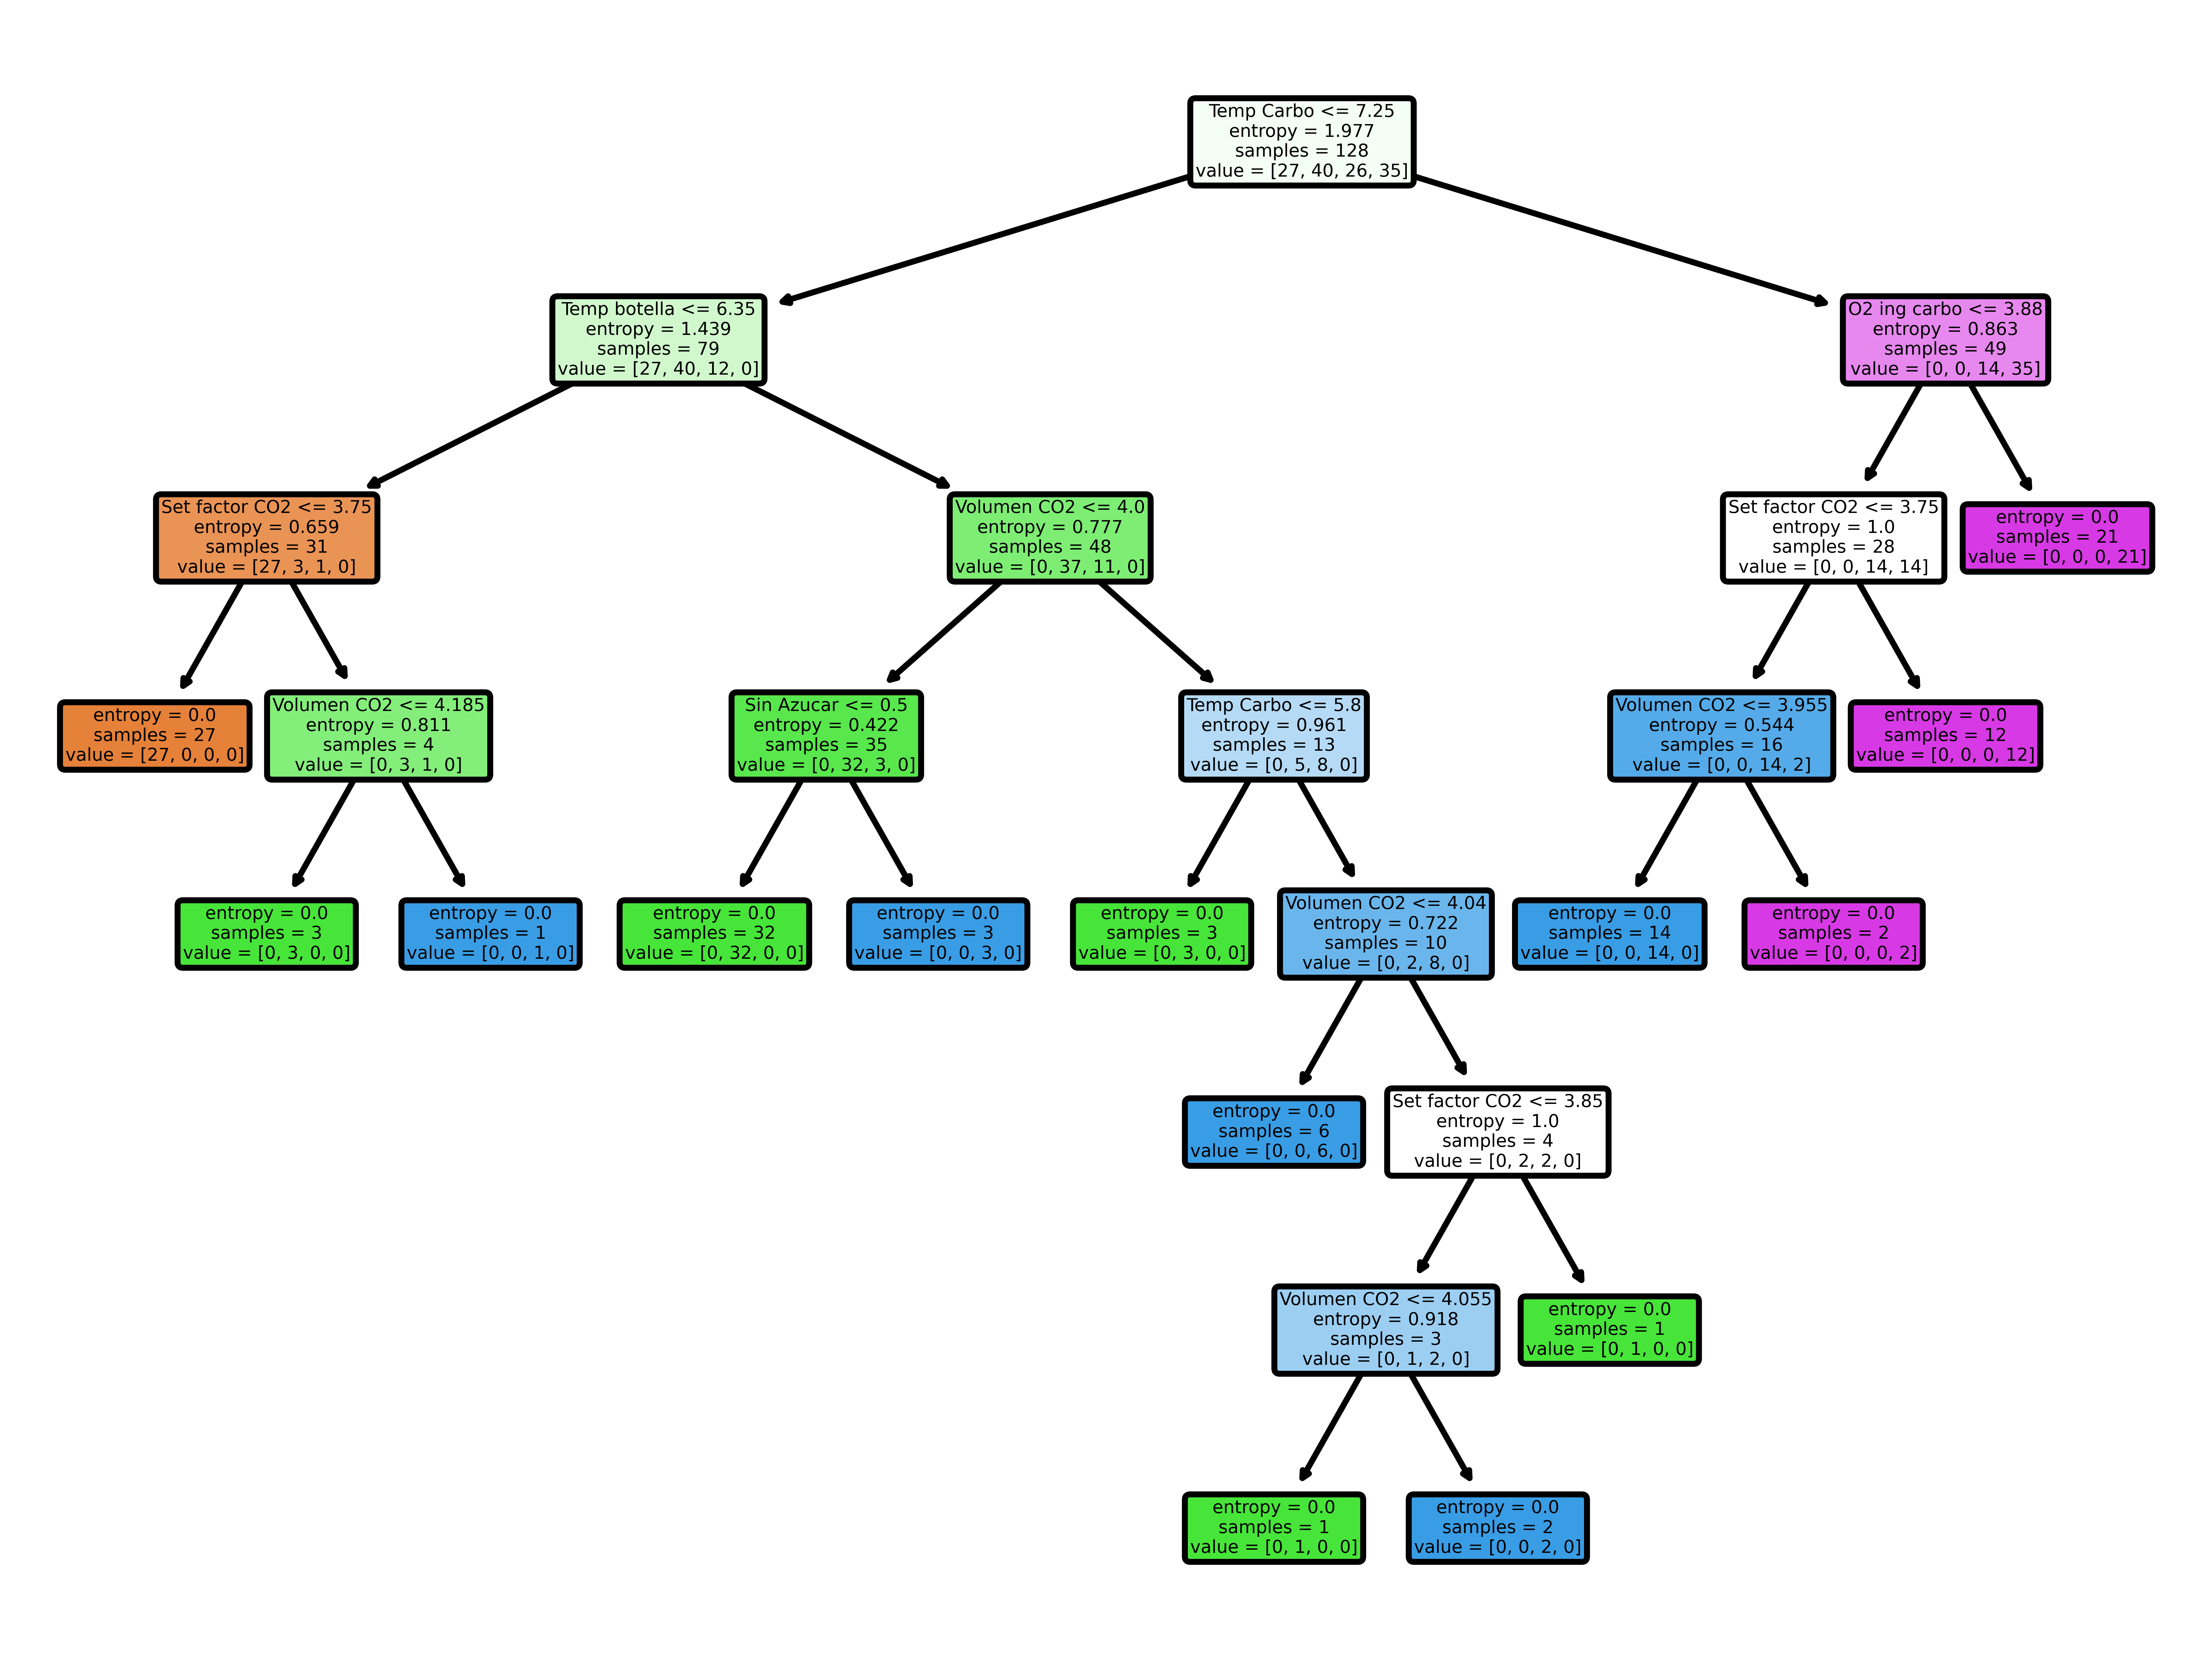

In [65]:
# Graficamos el árbol.
list_features=list(X.columns)
plt.figure(dpi=1500)
plot_tree(arbol, filled=True, rounded=True, feature_names=list_features)
plt.show()
plt.close()


In [66]:
# Hacemos predicciones y vemos si el árbol está sobreajustado.
y_pred = arbol.predict(X_test)

# Calculamos y mostramos la precisión del modelo en los datos de entrenamiento.
print('Score train: ', arbol.score(X_train, y_train))

# Calculamos y mostramos la precisión del modelo en los datos de prueba.
print('Score test:  ', arbol.score(X_test, y_test))

# Calculamos la precisión del modelo de árbol de decisión utilizando las
# etiquetas verdaderas 'y_test' y las predicciones 'y_pred'. 'accuracy_score'
# retorna la proporción de predicciones correctas.
tree_accuracy = accuracy_score(y_test, y_pred)

# Imprimimos la precisión del modelo de árbol de decisión.
print("Decision Tree Accuracy:", tree_accuracy)
# Imprimimos el informe de clasificación que incluye métricas como precisión, recall y F1-score
# para cada clase. 'classification_report' genera un informe de estas métricas.
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Calculamos el beneficio neto del modelo de árbol de decisión utilizando la función 'calcular_costo_beneficio'.
# Esta función toma como parámetros las etiquetas verdaderas 'y_test', las predicciones 'y_pred',
# el costo de falsos positivos 'costo_fp', el costo de falsos negativos 'costo_fn',
# y el beneficio de verdaderos positivos 'beneficio_tp' y verdaderos negativos 'beneficio_tn'.
beneficio_neto = calcular_costo_beneficio(y_test, y_pred, costo_fp, costo_fn, beneficio_tp, beneficio_tn)
print(f"Beneficio neto para el árbol: {beneficio_neto}")

Score train:  1.0
Score test:   0.9534883720930233
Decision Tree Accuracy: 0.9534883720930233
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.93      0.93        14
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        12

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



Beneficio neto para el árbol: 114.39999999999999


In [67]:
# Vemos la máxima profundidad y la cantidad de ojas que desarrolló nuestro árbol.

# Imprime la máxima profundidad del árbol de decisión
print(f'Máxima profundidad: {arbol.get_depth()}')
# Imprime la cantidad de hojas del árbol de decisión
print(f'Cantidad de hojas: {arbol.get_n_leaves()}')

# Crea una lista de profundidades del 1 al 7
depth=[i+1 for i in range(7)]
# Inicializa listas vacías para almacenar los puntajes de entrenamiento y prueba
scor_train=[]
scor_test=[]
# Itera sobre cada profundidad en la lista de profundidades
for dep in depth:
  # Crea un modelo de árbol de decisión con la profundidad máxima especificada
    tree=DecisionTreeClassifier(criterion=criterio, max_depth=dep, random_state = 16)
    tree.fit(X_train, y_train)
    pred=tree.predict(X_test)

    print(f'Profundidad: {dep}')
    print(f'Precisión train: {tree.score(X_train, y_train)}')
    print(f'Precisión test: {tree.score(X_test, y_test)}')

    scor_train.append(tree.score(X_train, y_train))
    scor_test.append(tree.score(X_test, y_test))


Máxima profundidad: 7
Cantidad de hojas: 14
Profundidad: 1
Precisión train: 0.5859375
Precisión test: 0.6046511627906976
Profundidad: 2
Precisión train: 0.7734375
Precisión test: 0.7441860465116279
Profundidad: 3
Precisión train: 0.9140625
Precisión test: 0.9069767441860465
Profundidad: 4
Precisión train: 0.984375
Precisión test: 0.9302325581395349
Profundidad: 5
Precisión train: 0.984375
Precisión test: 0.9767441860465116
Profundidad: 6
Precisión train: 0.9921875
Precisión test: 0.9302325581395349
Profundidad: 7
Precisión train: 1.0
Precisión test: 0.9534883720930233


In [68]:
# Grafico para identificar la profundidad conveniente del árbol.
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=depth, y=scor_train,
    mode='markers',
    marker=dict(color='blue', symbol='circle'),
    name='Score Entrenamiento'
))


fig.add_trace(go.Scatter(
    x=depth, y=scor_test,
    mode='markers',
    marker=dict(color='red', symbol='x'),
    name='Score Prueba'
))


fig.update_layout(
    title='Score árbol vs Profundidad',
    xaxis_title='Profundidad árbol',
    yaxis_title='Score',
    legend_title='Tipo de Score'
)

fig.show()
plt.close()

In [69]:
# Otro criterio es regular la cantidad de muestras por cada hoja
samplex=[i+1 for i in range(7)]
scor_train1=[]
scor_test1=[]
for sam in samplex:
    arbol=DecisionTreeClassifier(criterion=criterio, min_samples_leaf=sam, random_state = 16)
    arbol.fit(X_train, y_train)
    pred=arbol.predict(X_test)

    print(f'Profundidad: {sam}')
    print(f'Precisión train: {arbol.score(X_train, y_train)}')
    print(f'Precisión test: {arbol.score(X_test, y_test)}')

    scor_train1.append(arbol.score(X_train, y_train))
    scor_test1.append(arbol.score(X_test, y_test))

Profundidad: 1
Precisión train: 1.0
Precisión test: 0.9534883720930233
Profundidad: 2
Precisión train: 0.9765625
Precisión test: 0.9767441860465116
Profundidad: 3
Precisión train: 0.96875
Precisión test: 0.9302325581395349
Profundidad: 4
Precisión train: 0.9375
Precisión test: 0.9534883720930233
Profundidad: 5
Precisión train: 0.90625
Precisión test: 0.8837209302325582
Profundidad: 6
Precisión train: 0.890625
Precisión test: 0.813953488372093
Profundidad: 7
Precisión train: 0.890625
Precisión test: 0.8372093023255814


In [70]:
# Grafico para identificar la cantidad de muestras por hoja convenientes del árbol.
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=samplex, y=scor_train1,
    mode='markers',
    marker=dict(color='blue', symbol='circle'),
    name='Score Entrenamiento'
))


fig.add_trace(go.Scatter(
    x=samplex, y=scor_test1,
    mode='markers',
    marker=dict(color='red', symbol='x'),
    name='Score Prueba'
))


fig.update_layout(
    title='Score árbol vs Muestras en hoja',
    xaxis_title='Muestras en hoja',
    yaxis_title='Score',
    legend_title='Tipo de Score'
)

fig.show()

In [71]:
# Otro método para evitar overfiting: poda posterior (cost_complexity_pruning_path)
# Crear un clasificador de árbol de decisión con semilla aleatoria
clas = DecisionTreeClassifier(random_state=16)
# Calcular la ruta de poda por complejidad de costo
path = clas.cost_complexity_pruning_path(X_train, y_train)
# Obtener los alfas de poda y las impurezas correspondientes
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Crear una figura de Plotly
fig = go.Figure()

# Agregar una línea con marcadores para mostrar Impurity vs Alpha
fig.add_trace(go.Scatter(
    x=ccp_alphas[:-1], y=impurities[:-1],
    mode='lines+markers',
    marker=dict(symbol='circle', size=10),
    line=dict(shape='hv'),
    name='Impurity vs Alpha'
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Total de Impureza vs Alfa Efectivo para el Conjunto de Entrenamiento',
    xaxis_title='Alfa Efectivo',
    yaxis_title='Impureza Total de las Hojas',
    template='plotly_dark'
)
fig.show()

In [72]:
# Generamos una serie de árboles de decisión con diferentes valores de
# ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=16, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Número de nodos en el último árbol es: {} con ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Número de nodos en el último árbol es: 1 con ccp_alpha: 0.212944706784019


In [73]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Obtener el número de nodos y profundidad para cada árbol en clfs
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Crear una figura de Plotly
fig = go.Figure()
fig_1 = go.Figure()

fig.add_trace(go.Scatter(
    x=ccp_alphas,
    y=node_counts,
    mode='lines+markers',
    name='Number of nodes',
    line=dict(shape='hv')
))

# Crear el gráfico de profundidad vs alpha
fig_1.add_trace(go.Scatter(
    x=ccp_alphas,
    y=depth,
    mode='lines+markers',
    name='Depth of tree',
    line=dict(shape='hv'),
    yaxis="y"
))

# Actualizar el layout para incluir dos ejes y títulos
fig.update_layout(
    title="Ruta de poda de la complejidad del árbol",
    xaxis=dict(title='Alpha'),
    yaxis=dict(title='Numero de nodos'),
    legend=dict(x=0.01, y=0.99),
    template='plotly_dark'
)

fig_1.update_layout(
    title="Ruta de poda de la complejidad del árbol",
    xaxis=dict(title='Alpha'),
    yaxis=dict(title='Profundidad del Árbol'),
    legend=dict(x=0.01, y=0.99),
    template='plotly_dark'
)

fig.show()
fig_1.show()


In [74]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Crear una figura de Plotly
fig = go.Figure()

# Añadir la precisión del conjunto de entrenamiento
fig.add_trace(go.Scatter(
    x=ccp_alphas,
    y=train_scores,
    mode='lines+markers',
    name='Train Accuracy',
    line=dict(shape='hv')
))

# Añadir la precisión del conjunto de prueba
fig.add_trace(go.Scatter(
    x=ccp_alphas,
    y=test_scores,
    mode='lines+markers',
    name='Test Accuracy',
    line=dict(shape='hv')
))

# Actualizar el layout para incluir títulos y etiquetas
fig.update_layout(
    title="Accuracy vs Alpha para Entrenamiento y Testeo",
    xaxis=dict(title='Alpha'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.99, y=0.99),
    template='plotly_dark'
)

fig.show()



In [75]:
# Buscamos identificar el mejor valor de ccp_alpha para el árbol de decisión
alfas=ccp_alphas
scor=np.array(test_scores)

alfa_score=pd.DataFrame({'alpha':alfas, 'score':scor})
indice=alfa_score['score'].idxmax()
alfa_max=alfa_score['alpha'].iloc[indice]
print('Mejor alfa', alfa_max)
alfa_score.head(15)

Mejor alfa 0.0


alpha     score
0   0.000000  0.906977
1   0.006944  0.906977
2   0.007512  0.906977
3   0.011111  0.883721
4   0.011719  0.883721
5   0.014509  0.883721
6   0.023077  0.883721
7   0.042205  0.883721
8   0.044229  0.813953
9   0.063359  0.744186
10  0.184192  0.604651

In [76]:
# Utilizamos un árbol de decisión con poda por complejidad y los
# hiperparametros de máxima profundidad (max_depth) y el Número mínimo de
# muestras requeridas para ser una hoja (min_sample_leaf)
arbol_alfa=DecisionTreeClassifier(criterion=criterio, ccp_alpha = 0.006944, max_depth = 5, min_samples_leaf = 2)   #,ccp_alpha=alfa_best , class_weight='balanced')
arbol_alfa.fit(X_train, y_train)
y_pred_alfa = arbol_alfa.predict(X_test)

y_pred = arbol_alfa.predict(X_test)

# Calculamos y mostramos la presición del modelo con los datos de entrenamiento
print('Score train: ', arbol_alfa.score(X_train, y_train))
# Calculamos y mostramos la presición del modelo con los datos de prueba
print('Score test:  ', arbol_alfa.score(X_test, y_test))
# Imprimimos el informe de clasificación que incluye métricas como precisión, recall y F1-score
# para cada clase. 'classification_report' genera un informe de estas métricas.
print(classification_report(y_test, y_pred))
# Calculamos el beneficio neto del modelo de árbol de decisión utilizando la función 'calcular_costo_beneficio'.
# Esta función toma como parámetros las etiquetas verdaderas 'y_test', las predicciones 'y_pred',
# el costo de falsos positivos 'costo_fp', el costo de falsos negativos 'costo_fn',
# y el beneficio de verdaderos positivos 'beneficio_tp' y verdaderos negativos
# 'beneficio_tn'
beneficio_neto = calcular_costo_beneficio(y_test, y_pred, costo_fp, costo_fn, beneficio_tp, beneficio_tn)
print(f"Beneficio neto para el árbol: {beneficio_neto}")

Score train:  0.9765625
Score test:   0.9767441860465116
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        12

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.97        43
weighted avg       0.98      0.98      0.98        43



Beneficio neto para el árbol: 117.39999999999999


La línea de producción en cuestión tiene una capacidad de embotellado de 24,000 botellas por hora. Debido a la intensidad de los episodios de espumado, esta velocidad se ve disminuida. Hemos clasificado los niveles de espumado en cuatro categorías según la velocidad de embotellado que dicho espumado nos permita alcanzar.


Sin espumado "0": entre 23500 a 24000 b/h

Espumado bajo "1": un promedio de 22161.5 b/h

Espumado medio: "2": un promedio de 18619.5 b/h

Espumado alto: "3": un promedio de 12062 b/h


Teniendo en cuenta este contexto calcularemos el beneficio neto considerando los beneficios de los verdadero positivos y negativos como así también el costo de los falsos positivos y negativos.


beneficio_vp = $1.0 por botellas correctamente clasificadas como con espumado aceptable. (precio de venta)

costo_fp = $0.8 Pérdida por cada botella incorrectamente clasificada como aceptable, que puede llevar a reclamos o mala reputación. (costo de producción + posible impacto negativo)

beneficio_vn = $0.6 por botellas correctamente clasificadas como con espumado no aceptable. (ahorro del costo de producción)

costo_fn = $0.6 Pérdida por desechar una botella que en realidad es aceptable. (costo de producción de una botella desperdiciada)



In [77]:
# Escalamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# Definimos los modelos clasificadores
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
nb = GaussianNB()

# Definimos los hiperparámetros a probar
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Usamos GridSearchCV para cada modelo
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')

# Entrenamos y encontramos los mejores parámetros
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)
grid_nb.fit(X_train, y_train)

# Obtener los mejores modelos
best_knn = grid_knn.best_estimator_
best_dt = grid_dt.best_estimator_
best_svc = grid_svc.best_estimator_
best_nb = grid_nb.best_estimator_

print(f"Mejores parametros de Vecinos cercanos: {best_knn}")
print(f"Mejores parametros de Árbol de decisión: {best_dt}")
print(f"Mejores parámetros de Máquina de soporte vectorial: {best_svc}")
print(f"Mejor modelo de Naive Bayes: {best_nb}""\n")

# Evaluamos los modelos en el conjunto de prueba
models = {'KNN': best_knn, 'Decision Tree': best_dt, 'SVM': best_svc, 'Naive Bayes': best_nb}

# Asignamos valores monetarios a los diferentes resultados
beneficio_vp = 1.0
costo_fp = 0.8
beneficio_vn = 0.6
costo_fn = 0.6

mejor_modelo = None
mejor_beneficio = float('-inf')

beneficios_netos = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    beneficio_neto = calcular_costo_beneficio(y_test, y_pred, costo_fp, costo_fn, beneficio_tp, beneficio_tn)
    beneficios_netos.append((name, beneficio_neto))
    print(f"Beneficio neto para {name}: {beneficio_neto}")
    print('Score train: ', model.score(X_train, y_train))
    print('Score test:  ', model.score(X_test, y_test))
    print("\n",classification_report(y_test, y_pred))

    if beneficio_neto > mejor_beneficio:
        mejor_beneficio = beneficio_neto
        mejor_modelo = name

print(f"\nEl mejor modelo basado en el beneficio neto es: {mejor_modelo} con un beneficio neto de {mejor_beneficio}")

# Crear un DataFrame con los beneficios netos
df_beneficios = pd.DataFrame(beneficios_netos, columns=['Modelo', 'Beneficio Neto'])

# Crear la gráfica de barras interactiva
fig = px.bar(df_beneficios, x='Modelo', y='Beneficio Neto', title='Beneficio Neto de Cada Modelo',
             labels={'Beneficio Neto': 'Beneficio Neto ($)', 'Modelo': 'Modelos'},
             template='plotly_dark', text='Beneficio Neto')

# Mostrar los valores en las barras
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Mejorar la apariencia del gráfico
fig.update_layout(
    title='Comparación de Beneficio Neto entre Modelos',
    xaxis_title='Modelo',
    yaxis_title='Beneficio Neto ($)',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Mostrar la gráfica
fig.show()


Mejores parametros de Vecinos cercanos: KNeighborsClassifier(n_neighbors=7, weights='distance')
Mejores parametros de Árbol de decisión: DecisionTreeClassifier(max_depth=20)
Mejores parámetros de Máquina de soporte vectorial: SVC(C=10, kernel='linear')
Mejor modelo de Naive Bayes: GaussianNB(var_smoothing=1e-07)



Beneficio neto para KNN: 108.4
Score train:  1.0
Score test:   0.9069767441860465

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.93      0.93        14
           2       0.75      0.75      0.75         8
           3       0.92      0.92      0.92        12

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



Beneficio neto para Decision Tree: 111.39999999999999
Score train:  1.0
Score test:   0.9302325581395349

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.93      0.93        14
           2       0.86      0.75      0.80         8
           3       0.92      1.00      0.96        12

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.93      0.93      0.93        43



Beneficio neto para SVM: 105.4
Score train:  0.890625
Score test:   0.8837209302325582

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.81      0.93      0.87        14
           2       0.80      0.50      0.62         8
           3       0.92      1.00      0.96        12

    accuracy                           0.88        43
   macro avg       0.88      0.86      0.86        43
weighted avg       0.88      0.88      0.87        43



Beneficio neto para Naive Bayes: 99.39999999999999
Score train:  0.7578125
Score test:   0.8372093023255814

               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.79      0.79      0.79        14
           2       0.80      0.50      0.62         8
           3       0.92      1.00      0.96        12

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.83      0.84      0.83        43


El mejor modelo basado en el beneficio neto es: Decision Tree con un beneficio neto de 111.39999999999999


El Decision Tree es el modelo más confiable y rentable en este análisis. No solo tiene el beneficio neto más alto (111.39), sino que también maneja bien tanto el conjunto de entrenamiento como el de prueba con una precisión del 93% en el conjunto de prueba. Esto lo convierte en la mejor opción para predecir el nivel de espumado en bebidas en términos de beneficio económico y desempeño general.

KNN y Decision Tree mostraron puntajes de entrenamiento perfectos (1.0), lo que podría ser una indicación de sobreajuste. Sin embargo, el Decision Tree también tuvo el puntaje de prueba más alto (0.9302325581395349), lo que sugiere que maneja bien tanto el conjunto de entrenamiento como el de prueba.

SVM tuvo puntajes de entrenamiento y prueba consistentes (0.890625 y 0.8837209302325582 respectivamente), indicando que el modelo no está sobreajustado y tiene un buen desempeño general.

Naive Bayes tuvo el menor puntaje de entrenamiento (0.7265625) y prueba (0.7906976744186046), lo que sugiere que no es tan eficaz como los otros modelos en este caso.



---


**Costos actuales y beneficios esperados al implementar el modelo de clasificación basado en predicciones.**

**Datos iniciales:**

*   Velocidad nominal: 24000 botellas por hora.
*   Velocidad promedio actual: 19621 botellas por hora.

*   Velocidad después: 23678 botellas por hora.
*   Precio de venta por botella: $1.


*   Costo de producción por botella: $0.60.

*   Costos fijos mensuales: $50000.


*   Horas de operación diarias: 8 horas.
*   Días de operación mensuales: 30 días.


*   Desperdicio antes: 10%.
*   Desperdicio después: 3%.

**Definición de KPIs**


*  Incremento de la velocidad de producció: 20%

*   Reducción de desperdicios: 60%


*   Incremento del beneficio económico neto: 25%


**Producción mensual:**


*   Antes: 19621 botellas/hora × 8 horas/día × 30 días/mes = 4709040 botellas.
*   Después: 23678 botellas/hora × 8 horas/día × 30 días/mes = 5682720 botellas.

**Ingresos mensuales:**

*   Antes: 4709040 botellas × $1/botella = $4709040.
*   Después: 5682720 botellas × $1/botella = $5682720.

**Costos mensuales**

*Costos variables*:

*   Antes: 4709040 botellas × $0.60/botella = $2825424.
*   Después: 5682720 botellas × $0.60/botella = $3409632.

*Costos de desperdicio:*

*   Antes: 10% de 4709040 botellas = 470904 botellas. Costos de desperdicio: 470904 botellas × $0.60/botella = $282542.4.
*   Después: 3% de 5682720 botellas = 170481.6 botellas. Costos de desperdicio: 170481.6 botellas × $0.60/botella = $102288.96.

*Costos totales:*


*   Antes: $2825424 (variables) + $282542.4 (desperdicio) + $50000 (fijos) = $3157966.2.
*   Después: $3409632 (variables) + $102288.96 (desperdicio) + $50000 (fijos) = $3561920.

**Beneficios netos mensuales**


*   Antes: $4709040 - $3157966.2 = $1551073.8.

*   Después: $5682720 - $3561920 = $2120800.

**Incremento en los beneficios netos**


*   Incremento: $2120800 - $1551073.8 = $569726.2.

**Entonces, la mejora en la velocidad de embotellado, combinada con la reducción del desperdicio gracias a los modelos de clasificación, incrementaría los beneficios netos en $569,726.2 mensuales.**

**A continuación vemos un gráfico de barras en donde detallamos las variables anteriores**



In [79]:
# Definición de los datos
categorias = ['Antes', 'Después']
ingresos = [4709040, 5682720]
beneficios_netos = [1551073.8, 2120800]
costos_variables = [2825424, 3409632]
costos_desperdicio = [282542.4, 102288]
costos_totales = [3157966.2, 3561920]
desperdicio = [470904, 170481]

# Creación de la figura
fig = go.Figure()

# Añadir barras para ingresos
fig.add_trace(go.Bar(x=categorias, y=ingresos,
                     name='Ingresos', text=ingresos, textposition='auto'))

# Añadir barras para beneficios netos
fig.add_trace(go.Bar(x=categorias, y=beneficios_netos,
                     name='Beneficios Netos', text=beneficios_netos, textposition='auto'))

# Añadir barras para costos variables
fig.add_trace(go.Bar(x=categorias, y=costos_variables,
                     name='Costos Variables', text=costos_variables, textposition='auto'))

# Añadir barras para costos de desperdicio
fig.add_trace(go.Bar(x=categorias, y=costos_desperdicio,
                     name='Costos de Desperdicio', text=costos_desperdicio, textposition='auto'))

# Añadir barras para costos totales
fig.add_trace(go.Bar(x=categorias, y=costos_totales,
                     name='Costos Totales', text=costos_totales, textposition='auto'))

# Añadir barras para desperdicio
fig.add_trace(go.Bar(x=categorias, y=desperdicio,
                     name='Desperdicio', text=desperdicio, textposition='auto'))

# Actualizar el diseño del gráfico
fig.update_layout(
    barmode='group',  # Agrupar las barras
    title='Antes y después de aplicar el modelo de clasificación de espumado',
    xaxis_title='Condición',
    yaxis_title='Valor ($)',
    yaxis=dict(range=[0, max(max(ingresos), max(beneficios_netos), max(costos_variables), max(costos_desperdicio), max(costos_totales), max(desperdicio)) + 500000]),
)

# Mostrar gráfico interactivo
fig.show()


Los KPIs a considerar:

Incremento de la velocidad de producción: 20.67%

Reducción de desperdicios: 70%

Incremento del beneficio económico neto: 36.73%


In [80]:
# Datos de los KPIs combinados
kpis = ['Incremento de la velocidad de producción', 'Reducción de desperdicios', 'Beneficio económico neto']
valores_kpis = [20.67, 70, 36.73]

# Datos antes y después
etapas = ['Antes', 'Después']
velocidad = [19621, 23623]
desperdicio = [470904, 170589]
beneficios_netos = [1551073.8, 2122175]

# Crear la figura con subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "KPIs Combinados",
        "Velocidad de Producción",
        "Desperdicios",
        "Beneficios Netos"
    ),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Agregar gráfico de KPIs combinados
fig.add_trace(go.Bar(x=kpis, y=valores_kpis, text=valores_kpis, textposition='auto'), row=1, col=1)

# Agregar gráfico de velocidad de producción
fig.add_trace(go.Bar(x=etapas, y=velocidad, text=velocidad, textposition='auto'), row=1, col=2)

# Agregar gráfico de desperdicios
fig.add_trace(go.Bar(x=etapas, y=desperdicio, text=desperdicio, textposition='auto'), row=2, col=1)

# Agregar gráfico de beneficios netos
fig.add_trace(go.Bar(x=etapas, y=beneficios_netos, text=beneficios_netos, textposition='auto'), row=2, col=2)

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text="Análisis de KPIs y Resultados Antes y Después",
    showlegend=False,
    template='plotly_white'
)

# Actualizar ejes y títulos
fig.update_xaxes(title_text="KPIs", row=1, col=1)
fig.update_yaxes(title_text="Porcentaje (%)", row=1, col=1, range=[0, 100])

fig.update_xaxes(title_text="Etapa", row=1, col=2)
fig.update_yaxes(title_text="Velocidad (botellas/hora)", row=1, col=2)

fig.update_xaxes(title_text="Etapa", row=2, col=1)
fig.update_yaxes(title_text="Desperdicio (botellas)", row=2, col=1)

fig.update_xaxes(title_text="Etapa", row=2, col=2)
fig.update_yaxes(title_text="Beneficios Netos ($)", row=2, col=2)

# Mostrar el gráfico interactivo
fig.show()

# Zona de prueba

In [81]:


# Creamos una función que nos permita ingresar valores para las características
# y clasificar los datos basados en las predicciones de los modelos
# Solicitar al usuario que ingrese varios valores numéricos necesarios para la
# clasificación
def ingresar_valores_y_clasificar_todos():
    try:
        O2_ingreso = float(input("Ingrese el valor de O2 disuelto en el ingreso del Carbonatador "))
        Seteo_CO2 = float(input("Ingrese valor de seteo de CO2 "))
        Volumen_CO2 = float(input("Ingrese el valor del volumen de CO2 "))
        temp_botella = float(input("Ingrese la temperatura de carbonatación de la botella: "))
        temp_carbo = float(input("Ingrese la temperatura de carbonatación del Carbonatador "))
        sin_azucar = int(input("Ingrese 1 si la bebida es sin azucar, de lo contrario 0: "))
        print("\n")

        # Crear un array numpy con los valores ingresados
        valores_ingresados = np.array([[O2_ingreso, Seteo_CO2, Volumen_CO2, temp_botella,
                                        temp_carbo, sin_azucar ]])
        # Escalar los valores ingresados usando el scaler previamente ajustado
        valores_escalados = scaler.transform(valores_ingresados)
        # Definir un diccionario con los modelos de clasificación entrenados
        modelos = {
            'Árbol de Decisión': best_dt,
            'Árbol podado': arbol_alfa,
            'KNN': best_knn,
            'Máquina de Soporte Vectorial': best_svc,
            'Naive Bayes': best_nb
        }
        # Definir una función para traducir el nivel de espumado a texto
        def traducir_nivel_espumado(nivel):
            if nivel == 0:
                return "Sin espumado"
            elif nivel == 1:
                return "Espumado bajo"
            elif nivel == 2:
                return "Espumado medio"
            elif nivel == 3:
                return "Espumado alto"
            else:
                return "Desconocido"

        # Recorrer los modelos y realizar las predicciones
        for nombre_modelo, modelo in modelos.items():
            # Si el modelo es el árbol podado, usar valores no escalados
            if nombre_modelo == 'Árbol podado':
                prediccion = arbol_alfa.predict(valores_ingresados)
            # Para los demás modelos, usar los valores escalados
            else:
                    prediccion = modelo.predict(valores_escalados)
            # Traducir el nivel de espumado a texto
            nivel_espumado = traducir_nivel_espumado(prediccion[0])
            # Imprimir la predicción para el modelo actual
            print(f"El nivel de espumado predicho por {nombre_modelo} es: {nivel_espumado}")
            # Imprimir la predicción para el modelo actual
            print(f"El nivel de espumado predicho por {nombre_modelo} es: {prediccion[0]}")



    except ValueError:
        # Manejar el caso en que los valores ingresados no sean numéricos
        print("Por favor, ingrese valores numéricos válidos.")

    # Imprimir los valores ingresados y los valores escalados
    print("\nValores ingresados: ",valores_ingresados)
    print("Valores escalados: ",valores_escalados)

# Llamar a la función para ejecutar el proceso de ingreso de valores y
# clasificación
ingresar_valores_y_clasificar_todos()

Ingrese el valor de O2 disuelto en el ingreso del Carbonatador 0.6
Ingrese valor de seteo de CO2 3.5
Ingrese el valor del volumen de CO2 3.7
Ingrese la temperatura de carbonatación de la botella: 6.5
Ingrese la temperatura de carbonatación del Carbonatador 5.1
Ingrese 1 si la bebida es sin azucar, de lo contrario 0: 0


El nivel de espumado predicho por Árbol de Decisión es: Espumado bajo
El nivel de espumado predicho por Árbol de Decisión es: 1
El nivel de espumado predicho por Árbol podado es: Espumado bajo
El nivel de espumado predicho por Árbol podado es: 1
El nivel de espumado predicho por KNN es: Sin espumado
El nivel de espumado predicho por KNN es: 0
El nivel de espumado predicho por Máquina de Soporte Vectorial es: Sin espumado
El nivel de espumado predicho por Máquina de Soporte Vectorial es: 0
El nivel de espumado predicho por Naive Bayes es: Sin espumado
El nivel de espumado predicho por Naive Bayes es: 0

Valores ingresados:  [[0.6 3.5 3.7 6.5 5.1 0. ]]
Valores escalados: 

## Conclusión

## Implicaciones económicas
### Los modelos desarrollados para la predicción y clasificación en este proyecto tienen implicaciones económicas significativas, especialmente en términos de optimización de la producción y reducción de costos. Aquí se destacan algunos puntos clave:

### Optimización de Producción: Los modelos de clasificación y regresión pueden predecir con precisión la velocidad de llenado y el nivel de espumado. Esto permite ajustar los parámetros de la producción en tiempo real, asegurando una operación más eficiente y minimizando los desperdicios.

### Reducción de Costos: La capacidad de predecir y ajustar la producción puede reducir los costos operativos. Por ejemplo, un mejor control del nivel de espumado puede evitar la pérdida de producto, lo que directamente afecta el costo de producción y el beneficio neto.

### Incremento de Beneficio Neto: El análisis muestra que el modelo de Árbol de Decisión proporciona el mayor beneficio neto (111.39), seguido por KNN (108.4), SVM (105.4) y Naive Bayes (93.4). Esto sugiere que una implementación basada en el modelo de Árbol de Decisión podría ser económicamente más ventajosa para la empresa.

## Lecciones aprendidas
### Importancia de la calidad de los datos: La precisión de los modelos de clasificación depende en gran medida de la calidad y cantidad de datos disponibles. Datos precisos y bien etiquetados permiten entrenar modelos más eficientes y confiables.

### Elección del modelo: Diferentes modelos tienen distintas ventajas y desventajas. Aunque el Árbol de Decisiones mostró inicialmente un alto rendimiento, el ajuste de parámetros y la prevención del sobreentrenamiento hicieron que su rendimiento y su beneficio neto sean aún mayor.

### Optimización de parámetros: El uso de GridSearchCV y otras técnicas de optimización de hiperparámetros es crucial para encontrar la configuración óptima para cada modelo, mejorando así su rendimiento y aplicabilidad.

### Influencia de variables clave: Identificamos que la temperatura de la bebida, el volumen de CO2 y el aire disuelto son variables críticas para controlar el espumado. La correcta gestión de estas variables puede mejorar significativamente la eficiencia del proceso de embotellado.

## Áreas de mejora
### Mejora continua de los datos: Mantener y mejorar la calidad de los datos mediante la implementación de sensores más precisos y el registro constante de las variables del proceso.

### Automatización del control de calidad: Implementar sistemas automatizados para monitorear y ajustar en tiempo real las variables críticas del proceso, como la temperatura y el volumen de CO2, para mantenerlos dentro de los rangos óptimos.

### Capacitación del personal: Proporcionar formación continua al personal para que comprendan la importancia de las variables clave y cómo gestionarlas adecuadamente.

### Análisis en tiempo real: Desarrollar sistemas de análisis en tiempo real que permitan una respuesta inmediata a cualquier desviación en las variables críticas, minimizando así el riesgo de espumado excesivo y otros problemas de calidad.

### Este proyecto ha demostrado el potencial de las técnicas de clasificación para optimizar el proceso de embotellado de bebidas gaseosas, con importantes implicaciones económicas y operativas. La implementación de modelos de clasificación adecuados y la mejora continua de los procesos y datos pueden llevar a una mayor eficiencia, reducción de costos y mejora en la calidad del producto final.


## Gráficos de dispersión

In [82]:
X = df[['Temp Carbo','Volumen CO2']].values
y = df['Nivel de espumado'].values

h = .02  # tamaño del paso en la malla
cmap_bold = ['#FF0000', '#ff9933', '#FFFF00', '#00ffff']


def plot_decision_boundary(model, name, X, y):
    # Entrenar el modelo
    model.fit(X, y)

    # Definir límites de la gráfica
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = go.Figure()

    fig.add_trace(go.Contour(
        x=np.arange(x_min, x_max, h),
        y=np.arange(y_min, y_max, h),
        z=Z,
        colorscale=[[0, cmap_bold[0]], [0.33, cmap_bold[1]], [0.66, cmap_bold[2]], [1, cmap_bold[3]]],
        showscale=False,
        contours=dict(
            start=0,
            end=3,
            size=1,
            coloring='fill'
        )
    ))

    # Añadir los puntos de entrenamiento
    fig.add_trace(go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(
            color=[cmap_bold[i] for i in y],
            line=dict(color='black', width=1)
        )
    ))

    # Actualizar el layout
    fig.update_layout(
        title=f"{name} Classification",
        xaxis_title='Temp Carbo',
        yaxis_title='Volumen CO2',
        legend_title='Nivel de espumado',
    )

    # Añadir leyenda personalizada
    for i, color in enumerate(cmap_bold):
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color=color, symbol='circle'),
            name=str(i)
        ))

    # Mostrar gráfica
    fig.show()

# Aplicar la función a cada modelo
for name, model in models.items():
    plot_decision_boundary(model, name, X, y)




---


Simulación de escenario pasado:

A continuación vemos una simulación de un escenario semanal antes y después de aplicar el modelo de clasificación basado en predicciones.

Datos recolectados:


* Cantidad de botellas producidas: 904400

* Velocidad de producció promedio: 19466 botellas/ hora

* Porcentaje de desperdicios: 1.66% (327 botellas + 50000 litros de bebida)


* Beneficio económico neto semanal: $346433

Después de aplicar el modelo con mejor rendimiento (Arbol de decisiones):


* Cantidad de botellas producidas: 1109892

* Velocidad de producció promedio: 23107 botellas/ hora

* Porcentaje de desperdicios: 0.67% (31 botellas + 25000 litros de bebida)


* Beneficio económico neto semanal: $436425.8

KPIs:

* Incremento de la velocidad de producció: 18.70%

* Reducción de desperdicios: 59.64%

* Incremento del beneficio económico neto: 25.97%









In [83]:

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
produccion_antes = [168000, 176000, 156000, 90000, 168000, 146400]
produccion_despues = [180000, 189600, 188440, 182400, 183584, 185928]

velocidad_antes = [21000, 22000, 19500, 15000, 21000, 18300]
velocidad_despues = [22500, 23700, 23555, 23800, 22948, 23141]

# Crear el gráfico de líneas para la producción
fig = go.Figure()

fig.add_trace(go.Scatter(x=dias_semana, y=produccion_antes,
                         mode='lines+markers',
                         name='Producción Antes',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=dias_semana, y=produccion_despues,
                         mode='lines+markers',
                         name='Producción Después',
                         line=dict(color='green')))

# Crear el gráfico de barras para el velocidad
fig.add_trace(go.Bar(x=dias_semana, y=velocidad_antes,
                     name='Velocidad Antes',
                     marker_color='red',
                     opacity=0.5))

fig.add_trace(go.Bar(x=dias_semana, y=velocidad_despues,
                     name='Velocidad Después',
                     marker_color='orange',
                     opacity=0.5))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Comparación de Producción y Velocidad Diario Antes y Después de Implementar el Modelo',
    xaxis_title='Día de la Semana',
    yaxis_title='Cantidad',
    barmode='group',  # Agrupar barras
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()


In [84]:
# Datos de los KPIs combinados
kpis = ['Velocidad de embotellado', 'Reducción de desperdicios', 'Beneficio económico neto']
valores_kpis = [18.70, 56.64, 25.97]

# Datos antes y después
etapas = ['Antes', 'Después']
velocidad = [19621, 23500]
desperdicio = [15327, 7531]
beneficios_netos = [346433, 436425.8]

# Crear la figura con subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "KPIs Combinados",
        "Velocidad de Producción",
        "Desperdicios",
        "Beneficios Netos"
    ),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Agregar gráfico de KPIs combinados
fig.add_trace(go.Bar(x=kpis, y=valores_kpis, text=valores_kpis, textposition='auto'), row=1, col=1)

# Agregar gráfico de velocidad de producción
fig.add_trace(go.Bar(x=etapas, y=velocidad, text=velocidad, textposition='auto'), row=1, col=2)

# Agregar gráfico de desperdicios
fig.add_trace(go.Bar(x=etapas, y=desperdicio, text=desperdicio, textposition='auto'), row=2, col=1)

# Agregar gráfico de beneficios netos
fig.add_trace(go.Bar(x=etapas, y=beneficios_netos, text=beneficios_netos, textposition='auto'), row=2, col=2)

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text="Análisis de KPIs y Resultados Antes y Después",
    showlegend=False,
    template='plotly_white'
)

# Actualizar ejes y títulos
fig.update_xaxes(title_text="KPIs", row=1, col=1)
fig.update_yaxes(title_text="Porcentaje (%)", row=1, col=1, range=[0, 100])

fig.update_xaxes(title_text="Etapa", row=1, col=2)
fig.update_yaxes(title_text="Velocidad (botellas/hora)", row=1, col=2)

fig.update_xaxes(title_text="Etapa", row=2, col=1)
fig.update_yaxes(title_text="Desperdicio (botellas)", row=2, col=1)

fig.update_xaxes(title_text="Etapa", row=2, col=2)
fig.update_yaxes(title_text="Beneficios Netos ($)", row=2, col=2)

# Mostrar el gráfico interactivo
fig.show()

## Conclusión

## Implicaciones económicas
### Los modelos desarrollados para la predicción y clasificación en este proyecto tienen implicaciones económicas significativas, especialmente en términos de optimización de la producción y reducción de costos. Aquí se destacan algunos puntos clave:

### Optimización de Producción: Los modelos de clasificación y regresión pueden predecir con precisión la velocidad de llenado y el nivel de espumado. Esto permite ajustar los parámetros de la producción en tiempo real, asegurando una operación más eficiente y minimizando los desperdicios.

### Reducción de Costos: La capacidad de predecir y ajustar la producción puede reducir los costos operativos. Por ejemplo, un mejor control del nivel de espumado puede evitar la pérdida de producto, lo que directamente afecta el costo de producción y el beneficio neto.

### Incremento de Beneficio Neto: El análisis muestra que el modelo de Árbol de Decisión proporciona el mayor beneficio neto (111.39), seguido por KNN (108.4), SVM (105.4) y Naive Bayes (93.4). Esto sugiere que una implementación basada en el modelo de Árbol de Decisión podría ser económicamente más ventajosa para la empresa.

## Lecciones aprendidas
### Importancia de la calidad de los datos: La precisión de los modelos de clasificación depende en gran medida de la calidad y cantidad de datos disponibles. Datos precisos y bien etiquetados permiten entrenar modelos más eficientes y confiables.

### Elección del modelo: Diferentes modelos tienen distintas ventajas y desventajas. Aunque el Árbol de Decisiones mostró inicialmente un alto rendimiento, el ajuste de parámetros y la prevención del sobreentrenamiento hicieron que su rendimiento y su beneficio neto sean aún mayor.

### Optimización de parámetros: El uso de GridSearchCV y otras técnicas de optimización de hiperparámetros es crucial para encontrar la configuración óptima para cada modelo, mejorando así su rendimiento y aplicabilidad.

### Influencia de variables clave: Identificamos que la temperatura de la bebida, el volumen de CO2 y el aire disuelto son variables críticas para controlar el espumado. La correcta gestión de estas variables puede mejorar significativamente la eficiencia del proceso de embotellado.

## Áreas de mejora
### Mejora continua de los datos: Mantener y mejorar la calidad de los datos mediante la implementación de sensores más precisos y el registro constante de las variables del proceso.

### Automatización del control de calidad: Implementar sistemas automatizados para monitorear y ajustar en tiempo real las variables críticas del proceso, como la temperatura y el volumen de CO2, para mantenerlos dentro de los rangos óptimos.

### Capacitación del personal: Proporcionar formación continua al personal para que comprendan la importancia de las variables clave y cómo gestionarlas adecuadamente.

### Análisis en tiempo real: Desarrollar sistemas de análisis en tiempo real que permitan una respuesta inmediata a cualquier desviación en las variables críticas, minimizando así el riesgo de espumado excesivo y otros problemas de calidad.

### Este proyecto ha demostrado el potencial de las técnicas de clasificación para optimizar el proceso de embotellado de bebidas gaseosas, con importantes implicaciones económicas y operativas. La implementación de modelos de clasificación adecuados y la mejora continua de los procesos y datos pueden llevar a una mayor eficiencia, reducción de costos y mejora en la calidad del producto final.


# ¡Muchas gracias!